In [543]:
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [544]:
def generar_poblacion_informal(tamanno= 100, valor_inicial= 170):
    pob = np.random.normal(loc= valor_inicial, scale= 10, size= tamanno)
    for i, oferta in enumerate(pob):
        pob[i] = int(oferta)
    return pob

In [545]:
# Para simular los dólares que el Estado puede vender
def generar_poblacion_formal(tamanno_poblacion_informal=100,
                            probabilidad_generar= 0.3,
                            porciento_generacion= 0.1):
    tamanno_poblacion_formal = 0
    if np.random.uniform() < probabilidad_generar:
        tamanno_poblacion_formal = int(np.random.uniform(1, porciento_generacion*tamanno_poblacion_informal))
    return tamanno_poblacion_formal

In [546]:
# Simula los dólares que se importan y se insertan en el mercado informal
# Serán ofertas sobre la medida de tendencia central, con una desviación de 10
def generar_poblacion_informal_extra(tamanno_poblacion_informal=100,
                            probabilidad_generar= 0.3,
                            porciento_generacion= 0.1,
                            valor_medida= 170,
                            desviacion = 10):
    poblacion_informal_extra = []
    tamanno_poblacion_informal_extra = 0
    if np.random.uniform() < probabilidad_generar:
        tamanno_poblacion_informal_extra = int(np.random.uniform(1, porciento_generacion*tamanno_poblacion_informal))
    poblacion_informal_extra = list(np.random.normal(loc= valor_medida+desviacion, scale= desviacion, size= tamanno_poblacion_informal_extra))
    return poblacion_informal_extra


In [547]:
def mezclar_poblaciones(poblacion_informal, tamanno_poblacion_formal):
    if tamanno_poblacion_formal > 0:
        high = len(poblacion_informal)
        for _ in range(0,tamanno_poblacion_formal):
            indice = np.random.randint(0,high)
            poblacion_informal[indice] = 125
    return poblacion_informal

In [548]:
from operator import concat


def simular(tamanno_poblacion_informal=100,
            valor_inicial= 170,
            iteraciones=100,
            medida= 'media',
            probabilidad_generar_formal= 0.3,
            porciento_generacion_formal= 0.1,
            probabilidad_generar_informal= 0.3,
            porciento_generacion_informal= 0.1):
    comportamiento = [valor_inicial]
    for i in range(0, iteraciones):
        poblacion_informal = generar_poblacion_informal(tamanno_poblacion_informal,
                                                        valor_inicial= valor_inicial)
        tamanno_poblacion_formal = \
            generar_poblacion_formal(tamanno_poblacion_informal=tamanno_poblacion_informal,
                                    probabilidad_generar= probabilidad_generar_formal,
                                    porciento_generacion= porciento_generacion_formal)        
        poblacion_informal_extra = generar_poblacion_informal_extra(
            tamanno_poblacion_informal=tamanno_poblacion_informal,
            probabilidad_generar= probabilidad_generar_informal,
            porciento_generacion= porciento_generacion_informal,
            valor_medida= valor_inicial
        )
        poblacion_informal = np.concatenate(( poblacion_informal, poblacion_informal_extra))
        mezcla = mezclar_poblaciones(poblacion_informal= poblacion_informal,
            tamanno_poblacion_formal=tamanno_poblacion_formal)
        if medida == 'media':
            valor_inicial = np.mean(mezcla)
        elif medida == 'mediana':
            valor_inicial = np.median(mezcla)
        elif medida == 'moda':
            valor_inicial = statistics.mode(mezcla)
        comportamiento.append(valor_inicial)
    return comportamiento

In [549]:
def ejecutar_simulaciones(cantidad= 30,
                        tamanno_poblacion_informal=100,
                        valor_inicial= 170,
                        iteraciones=100,
                        medida= 'media',
                        probabilidad_generar_formal= 0.3,
                        porciento_generacion_formal= 0.1,
                        probabilidad_generar_informal= 0.0,
                        porciento_generacion_informal= 0.0):
    simulaciones = []
    for i in range(0, cantidad):
        simulacion =simular(tamanno_poblacion_informal=tamanno_poblacion_informal,
                            valor_inicial= valor_inicial,
                            iteraciones=iteraciones,
                            medida= medida,
                            probabilidad_generar_formal= probabilidad_generar_formal,
                            porciento_generacion_formal= porciento_generacion_formal,
                            probabilidad_generar_informal= probabilidad_generar_informal,
                            porciento_generacion_informal= porciento_generacion_informal)
        simulaciones.append(simulacion)
    return simulaciones

In [550]:
def estadistica_varias_simulaciones(simulaciones, tamanno_individual_simulacion):
    media = []
    for i in range(0,tamanno_individual_simulacion):
        datos_iteracion_i = []
        for simulacion in simulaciones:
            datos_iteracion_i.append(simulacion[i])
        media.append(np.mean(datos_iteracion_i))
    return media

In [551]:
def graficar_simulaciones(simulaciones, tamanno_individual_simulacion):
    y = range(0,tamanno_individual_simulacion)
    for simulacion in simulaciones:
        plt.plot(y, simulacion)
    media = estadistica_varias_simulaciones(simulaciones, tamanno_individual_simulacion)
    plt.plot(y, media, linewidth= 3, color= 'black')
    plt.show()

## Test 1 Distribución Normal
- Media
- Con mercado formal
- Probabilidad de generar 0.3
- Produccion 0.1
- Sin importación

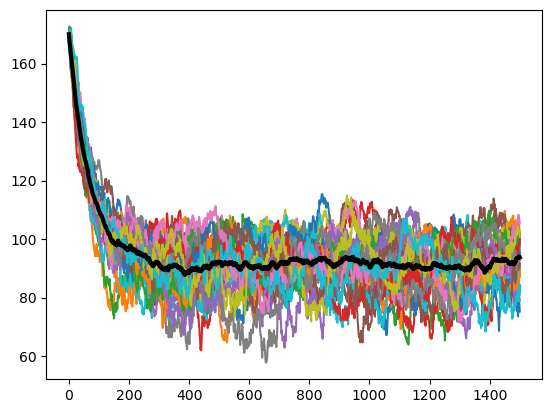

In [552]:
simulaciones1 = ejecutar_simulaciones(
                    cantidad=30,
                    iteraciones=1500,
                    medida='media',
                    probabilidad_generar_formal= 0.3,
                    porciento_generacion_formal= 0.1)
graficar_simulaciones(simulaciones1,1501)

## Test 2 Distribución Normal
- Mediana
- Con mercado formal
- Probabilidad de generar 0.3
- Produccion 0.1
- Sin importación

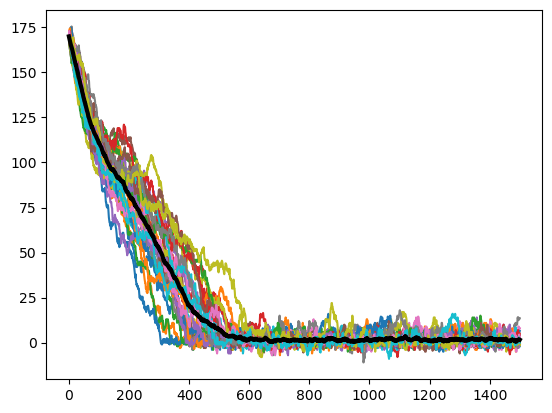

In [553]:
simulaciones2 = ejecutar_simulaciones(
                    cantidad=30,
                    iteraciones=1500,
                    medida='mediana',
                    probabilidad_generar_formal= 0.3,
                    porciento_generacion_formal= 0.1)
graficar_simulaciones(simulaciones2,1501)

## Test 3 Distribución Normal
- Moda
- Con mercado formal
- Probabilidad de generar 0.3
- Produccion 0.1
- Sin Importación

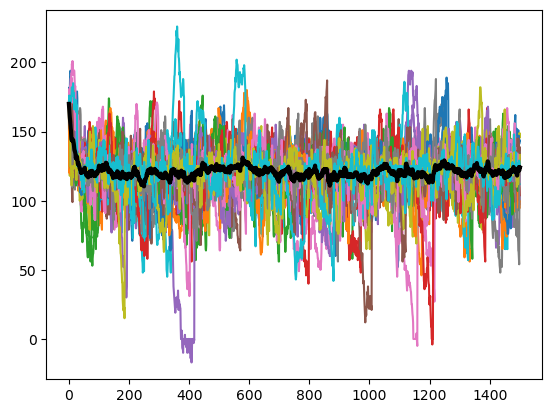

In [554]:
simulaciones3 = ejecutar_simulaciones(
                    cantidad=30,
                    iteraciones=1500,
                    medida='moda',
                    probabilidad_generar_formal= 0.3,
                    porciento_generacion_formal= 0.1)
graficar_simulaciones(simulaciones3,1501)

## Test 4 Distribución Normal
- Media
- Con mercado formal
- Probabilidad de generar 0.3
- Produccion 0.1
- Con importación
- Probabilidad de generar 0.9
- Produccion 0.2

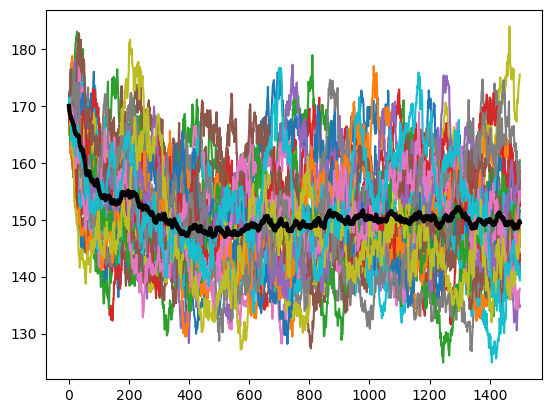

In [555]:
simulaciones4 = ejecutar_simulaciones(
                    cantidad=30,
                    iteraciones=1500,
                    medida='media',
                    probabilidad_generar_formal= 0.3,
                    porciento_generacion_formal= 0.1,
                    probabilidad_generar_informal= 0.9,
                    porciento_generacion_informal= 0.2)
graficar_simulaciones(simulaciones4,1501)

## Test 5 Distribución Normal
- Mediana
- Con mercado formal
- Probabilidad de generar 0.3
- Produccion 0.1
- Con importación
- Probabilidad de generar 0.9
- Produccion 0.2

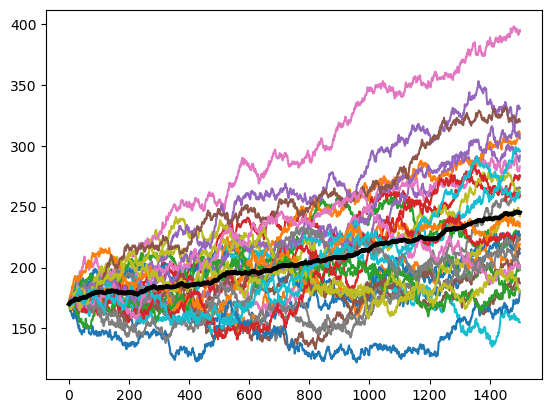

In [556]:
simulaciones5 = ejecutar_simulaciones(
                    cantidad=30,
                    iteraciones=1500,
                    medida='mediana',
                    probabilidad_generar_formal= 0.3,
                    porciento_generacion_formal= 0.1,
                    probabilidad_generar_informal= 0.9,
                    porciento_generacion_informal= 0.2)
graficar_simulaciones(simulaciones5,1501)

## Test 6 Distribución Normal
- Moda
- Con mercado formal
- Probabilidad de generar 0.3
- Produccion 0.1
- Con importación
- Probabilidad de generar 0.9
- Produccion 0.2

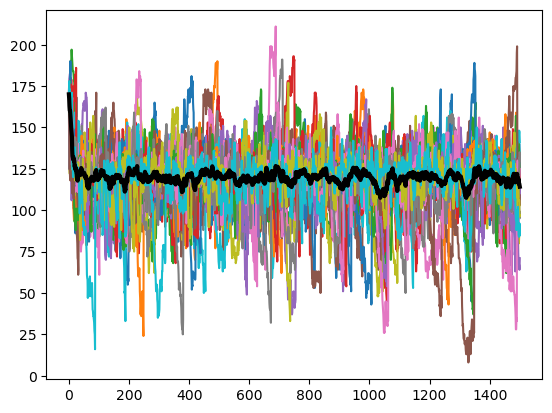

In [557]:
simulaciones6 = ejecutar_simulaciones(
                    cantidad=30,
                    iteraciones=1500,
                    medida='moda',
                    probabilidad_generar_formal= 0.3,
                    porciento_generacion_formal= 0.1,
                    probabilidad_generar_informal= 0.9,
                    porciento_generacion_informal= 0.2)
graficar_simulaciones(simulaciones6,1501)